In [1]:
import os

os.sys.path.append(os.path.join(os.getcwd(), "../.."))

In [2]:
import numpy as np
import matplotlib as mpl
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from databases.connector import Connector
from models.ExportFormat import ExportFormat
from metrics.result import sklearn_metrics_table, as_matrix, get_run_support_count

In [3]:
load_dotenv()

connector = Connector(ExportFormat.JSON)

In [4]:
run_ids = ["66ec290bf5d5d44089db60dc"]
stop_at_level = 1
sort_by_metric = "fscore"

metrics_matrices = []
support_counts = []
for run_id in run_ids:
    run_results = connector.client.get_prompt_results({"run_id": run_id})
    run_results_list = list(run_results)

    metrics_table = sklearn_metrics_table(run_results_list, sort_by=sort_by_metric)

    metrics_matrix = as_matrix(metrics_table)

    run_support_count = get_run_support_count(run_id)
    support_counts.append(run_support_count)

    metrics_matrix["support_count"] = run_support_count

    metrics_matrices.append(metrics_matrix)

Generating metrics table...


21it [00:00, 71377.94it/s]


Shapping table to matrices...


100%|██████████| 21/21 [00:00<00:00, 564617.85it/s]


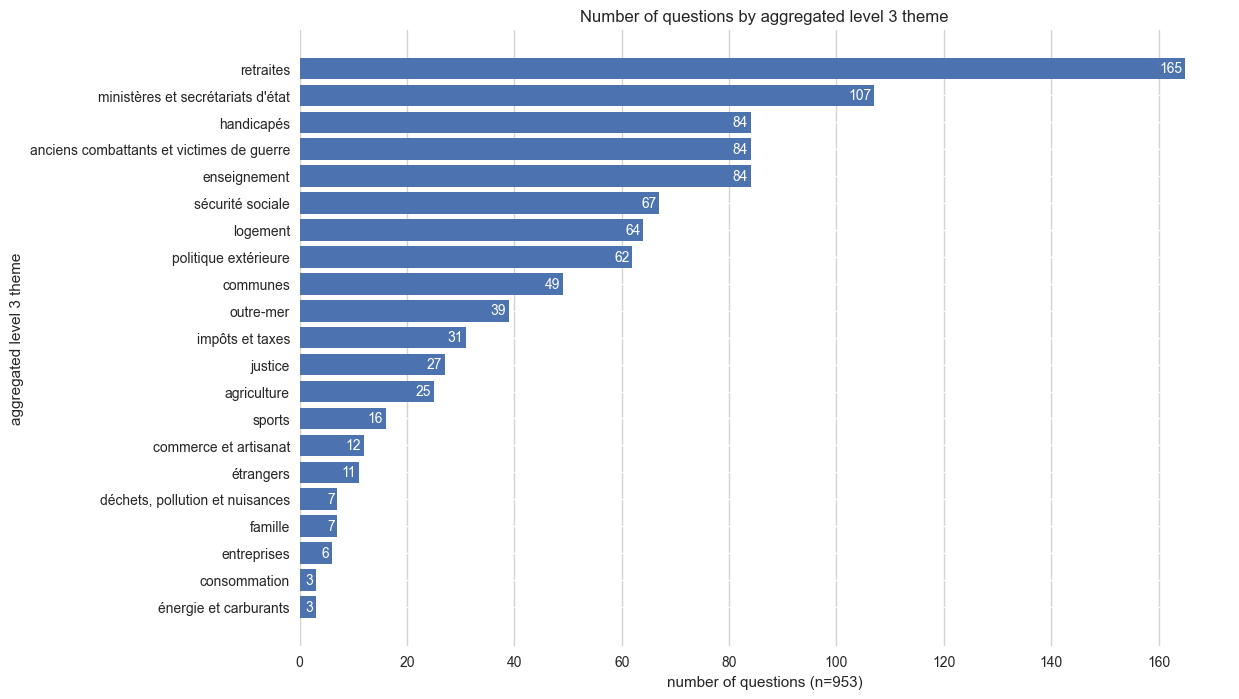

In [5]:
for support_count in support_counts:
    total = sum(support_count.values())
    sorted_support_count = dict(sorted(support_count.items(), key=lambda item: item[1]))

    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(12, 8))
    plt.gca().set_facecolor((1.0, 1.0, 1.0))
    plt.title('Number of questions by aggregated level 3 theme')
    plt.ylabel('aggregated level 3 theme')
    plt.xlabel(f'number of questions (k={total})')
    plt.grid(axis="x", color="lightgrey")

    bars = plt.barh(sorted_support_count.keys(), sorted_support_count.values())

    for bar in bars:
        plt.text(
            bar.get_width() - 0.5,
            bar.get_y() + bar.get_height() / 2,
            f'{int(bar.get_width())}',
            va='center',
            ha='right',
            color='white'
        )

    plt.show()

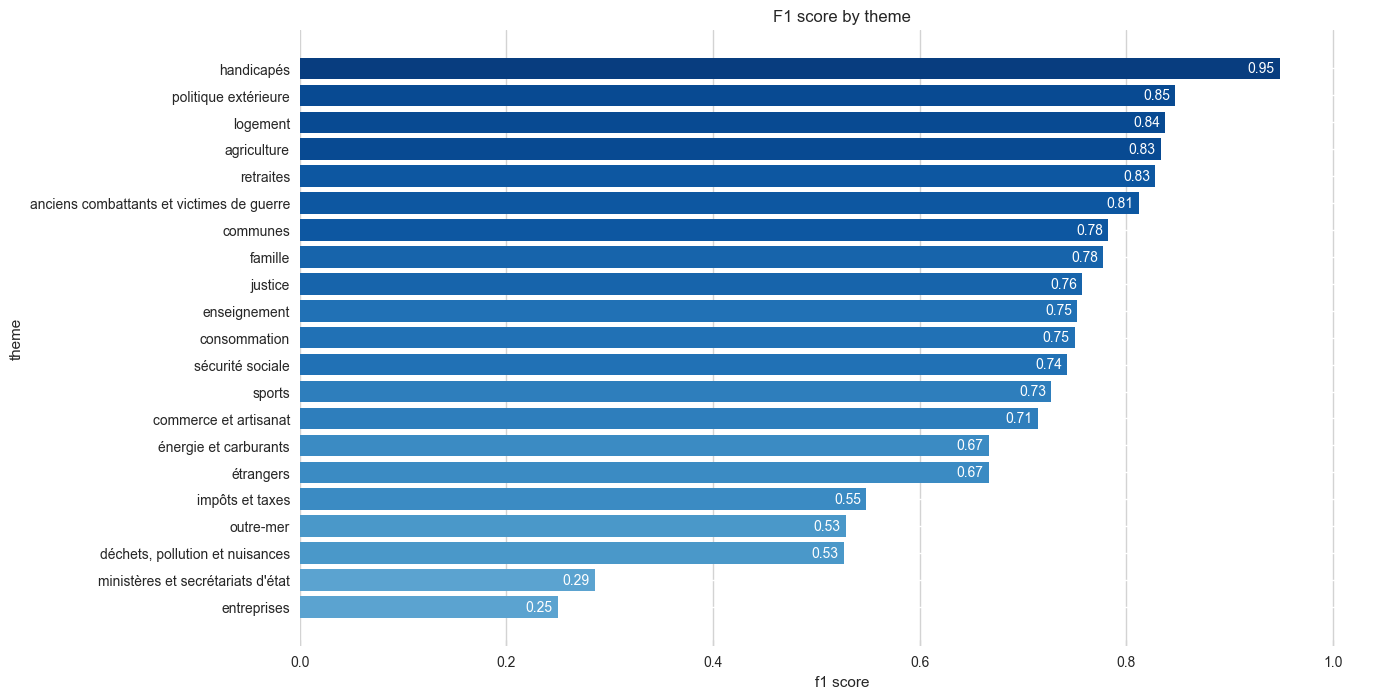

In [6]:
for metrics_matrix in metrics_matrices:
    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(14, 8))

    blues = mpl.colormaps['Blues'].resampled(len(metrics_matrix["themes"]))
    scale = np.linspace(1.7, 2.5, len(metrics_matrix["themes"]))
    color_scale = np.log(scale)
    reversed_color_scale = list(reversed(color_scale))

    bars = plt.barh(width=metrics_matrix["fscores"], y=metrics_matrix["themes"], color=blues(reversed_color_scale))

    plt.gca().invert_yaxis()
    plt.gca().set_facecolor((1.0, 1.0, 1.0))

    for bar in bars:
        plt.text(
            bar.get_width() - 0.005,
            bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.2f}',
            va='center',
            ha='right',
            color='white'
        )

    ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
    for x in ticks:
        plt.axvline(x=x, color='lightgrey', linewidth=1, ymax=0.01)

    plt.grid(axis="x", color="lightgrey")
    plt.title('F1 score by theme')
    plt.xlabel('f1 score')
    plt.ylabel('theme')
    plt.xticks(ticks)

    plt.show()

In [7]:
mean_precision = round(np.mean([x["precisions"] for x in metrics_matrices]), 4)
mean_recall = round(np.mean([x["recalls"] for x in metrics_matrices]), 4)
mean_fscore = round(np.mean([x["fscores"] for x in metrics_matrices]), 4)

print(f"mean precision : {mean_precision}")
print(f"mean recall : {mean_recall}")
print(f"mean fscore : {mean_fscore}")

mean precision : 0.6836
mean recall : 0.7732
mean fscore : 0.6945


In [9]:
median_precision = round(np.median([x["precisions"] for x in metrics_matrices]), 4)
median_recall = round(np.median([x["recalls"] for x in metrics_matrices]), 4)
median_fscore = round(np.median([x["fscores"] for x in metrics_matrices]), 4)

print(f"median precision : {median_precision}")
print(f"median recall : {median_recall}")
print(f"median fscore : {median_fscore}")

median precision : 0.7059
median recall : 0.8065
median fscore : 0.75


In [10]:
median_precision = round(np.std([x["precisions"] for x in metrics_matrices]), 4)
median_recall = round(np.std([x["recalls"] for x in metrics_matrices]), 4)
median_fscore = round(np.std([x["fscores"] for x in metrics_matrices]), 4)

print(f"median precision : {median_precision}")
print(f"median recall : {median_recall}")
print(f"median fscore : {median_fscore}")

median precision : 0.1795
median recall : 0.2177
median fscore : 0.1735
